# Statistics & Linear Algebra

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%pylab inline
pylab.rcParams['figure.figsize'] = (12.0, 10.0)

Populating the interactive namespace from numpy and matplotlib


In this unit, we're going to review the statistics we learned in the prep course, and then learn more advanced techniques and terms.  Then we will learn the basics of real vectors, and matrix multiplication with an aim to understanding linear regression.


## Statistics

### Review

In unit 0 we learned about the most commonly used measure of central tendency and dispersion.

**Central Tendency**

*  **Mean**:  this is the term for what we generally call an "average".  We add all of the numbers in our data set, and then divide by the size of the set.  Symbolically, if $\{a_1,a_2,\ldots,a_n\}$ is our data set, then the arithmetic mean (denoted $\mu$) is computed as $$ \mu = \frac{1}{n}\sum_{i=1}^na_i = \frac{1}{n}(a_1+a_2+\ldots+a_n). $$
* **Median**: for a given data set (of numbers), the median is the number that separates the top half of the data from the bottom half.  If the size of the data set is even )so there is no single data point in the middle), the median is given by the mean of the two middle values, after arranging the data into ascending order.
* **Mode**: the mode is the number that occurs most frequently in a data set.

**Dispersion**

* **Variance**: is essence, variance describes how far a data set is spread out from its mean.  Let $X=\{x_1,x_2,\ldots,x_n\}$, and let $\mu$ denote the arithmetic mean of $X$.  The variance of $X$ is defined as
$$ \text{Var}(X) := \sigma^2 = \frac{1}{n}\sum_{i=1}^n (x_i-\mu)^2=\frac{1}{n}\left((x_1-\mu)^2+(x_2-\mu)^2+\ldots+(x_n-\mu)^2\right).$$  In other words, we take the arithmetic mean of the * squared-difference between the data set elements and the set's mean*.
* **Standard Deviation**: the standard deviation is the square root of the variance.  One useful property of the standard deviation is that it is in the same units as the original data set (unlike the variance).  A low standard deviation implies the data set points are clustered near the mean, whereas a high standard deviation implies the data set points tend to be further from the mean.  Symbolically, the standard deviation of $X=\{x_1,x_2,\ldots,x_n\}$ is given by:
  $$ \sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n (x_i-\mu)^2} = \sqrt{\frac{1}{n}\left((x_1-\mu)^2+(x_2-\mu)^2+\ldots+(x_n-\mu)^2\right)} $$

We can use in-built NumPy functions to calculate statistics of Series objects that we have:

In [2]:
s = pd.Series([2,4,10,3,5])
s.mean()

4.8

In [3]:
s.std(ddof=0)

2.785677655436824

(Note:  the `ddof=0` sets degrees of freedom to 0, as Pandas defaults to 1.  This is in reference to uncorrected/corrected sample standard deviation, the latter of which is defined as
$$ \sigma = \sqrt{\frac{1}{n-1}\sum_{i=1}^n (x_i-\mu)^2} $$
This definition attempts to limit biases when estimating sample population standard deviation, wutg the $n-1$ refering to the degrees of freedom in deviations from the mean.)

In [4]:
s.median()

4.0

In [5]:
s.var()

9.700000000000001

### Rolling Computations

When we have time-series data, we can compute various statistics that update as time goes on by using *rolling* or *moving* computations.  Let's look at an example, computing the rolling mean.

1. Suppose we have a sequence of time-series numeric data at a 1-minute interval.  The first thing we have to do is decide the *window length* for the computation.  If we choose 5 minutes as the window length, then we start with the first 5 minutes of data, and compute the mean for that.  
2. Then we "roll" the window forward by one minute, and compute the mean of minutes 2 through 6.
3. Then we move the window forward again, and repeat until we run out of data.  

This gives us an idea at any minute of how various descriptive statistics of our data are changing over time.  Here's a compute example:

In [6]:
df = pd.DataFrame({'Price':np.random.randint(2,17,30)}, index=pd.date_range('09:00:00',periods=30,freq='min'))
df

,Price
2018-07-26 09:00:00,14
2018-07-26 09:01:00,13
2018-07-26 09:02:00,15
2018-07-26 09:03:00,5
2018-07-26 09:04:00,9
2018-07-26 09:05:00,10
2018-07-26 09:06:00,16
2018-07-26 09:07:00,3
2018-07-26 09:08:00,12
2018-07-26 09:09:00,6


We're going to add a new column for the 5 minute moving average, and accomplish this using the syntax `Series.rolling(window=5).mean()`.  Here, we could replace `.mean()` with any other computational function we were interested in.

In [7]:
df['5min MA'] = df['Price'].rolling(window=5).mean()
df.head(10)

,Price,5min MA
2018-07-26 09:00:00,14,NaN
2018-07-26 09:01:00,13,NaN
2018-07-26 09:02:00,15,NaN
2018-07-26 09:03:00,5,NaN
2018-07-26 09:04:00,9,11.2
2018-07-26 09:05:00,10,10.4
2018-07-26 09:06:00,16,11.0
2018-07-26 09:07:00,3,8.6
2018-07-26 09:08:00,12,10.0
2018-07-26 09:09:00,6,9.4


The first four entries are empty because it needs 5 periods of data to compute the rolling window.  Everything after this will have values, though:

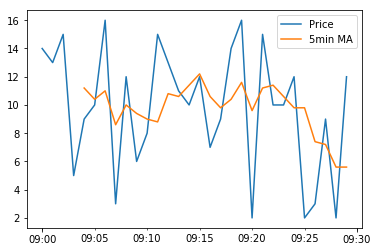

In [8]:
df.plot()

Rolling statistical windows let us have a broader view of how our data is changing over time. This sort of rolling statistic is used frequently as indicators in financial price series:

Given a time-series data set, with an $N$-period moving average $\mu_N$ and an $N$-period standard deviation $\sigma_N$, the **K-Upper Bollinger Bands** are defined as the rolling computation $(\mu_N + K\sigma_N)$ for some $K=1,2,\ldots$. Similarly, the **K-Lower Bollinger Bands** are $(\mu_N - K\sigma_N)$.

Here is a visualization of the bands:

 <img src="http://i.imgur.com/rIteFX3.png",width=800,height=800>

The red and green bars represent price movements; the blue line is the rolling mean of the prices, and the black lines are the upper and lower Bollinger bands.  These indicators are used to measure the *volatility* of the prices. As the Bollinger bands come close together, there is less price movement, and thus less volatility; when the bands expand from the mean, there are more dramatic changes in price, meaning the volatility is higher.


In addition to the idea of a rolling computation is an *expanding* computation.  With rolling, the window remains a fixed length, and moves along the data.  An expanding computation remains anchored at the first point, and then *increases* the size of the window as you move along the data.  This means that all of the data up to any given point is used in the computation.  This can be accomplished with the `.expanding().mean` command.

In [17]:
df['Expanding Mean'] = df['Price'].expanding(min_periods=1).mean()

In [18]:
df

,Price,5min MA,Expanding Mean
2018-07-26 09:00:00,14,NaN,14.000000
2018-07-26 09:01:00,13,NaN,13.500000
2018-07-26 09:02:00,15,NaN,14.000000
2018-07-26 09:03:00,5,NaN,11.750000
2018-07-26 09:04:00,9,11.2,11.200000
2018-07-26 09:05:00,10,10.4,11.000000
2018-07-26 09:06:00,16,11.0,11.714286
2018-07-26 09:07:00,3,8.6,10.625000
2018-07-26 09:08:00,12,10.0,10.777778
2018-07-26 09:09:00,6,9.4,10.300000


Here is a graphical representation of both a rolling and an expanding mean on a financial instrument's prices.

 <img src="http://i.imgur.com/RyAZ8HX.png",width=800,height=800>

The rolling mean is affected by changes over smaller times, whereas the expanding mean moves slower and is affected by larger movements over time.  Rolling computations are the ones you will see most frequently, but expanding computations are used in certain kinds of directed model validation, and other forecasting where the global structure of the data is important to the model.

### Covariance, Correlation

When we have two different data sets, we may wish to know 'vary' in the same ways; i.e.: if the large values of one set correspond closely with the large values of the other, and similarly for the small values.  This is a very handy way of deciding how to model various data, as well as potentially helping to reduce the number of "independent" features.  As an example, if you have a trading strategy that works very well on the S&P 500, and you can determine that the prices for the S&P and NASDAQ very closely move together, then it's likely your trading strategy will also work very well on NASDAQ.

Given two data sets $X=\{x_1,x_2,\ldots,x_n\},\,Y=\{y_1,y_2,\ldots,y_n\}$, the covariance is computed as:
$$ \text{Cov}(X,Y) = \sigma_{XY} = \frac{1}{n} \sum_{i=1}^n (x_i - \mu_X)(y_i-\mu_Y) $$
where $\mu_X$ is the mean of $X$, etc.  If the covariance is positive, this means the two sets behave similarly; the covariance being negative means the sets tend to behave in opposite fashions (one goes up when the other goes down). 

Note: the *variance* of a data set is a special case of the covariance; in particular, the variance of $X$ is $\text{Cov}(X,X)$.

We can use Pandas to compute the pairwise covariance of columns of a Dataframe, using the `dataframe.cov()` function:

In [22]:
c = pd.DataFrame({'A':[0,-2,-5,7,7,5,2,-2,-4,5,-5,12,3,6,10,0,6,5,7,12],
                  'B:':[-2,-6,-12,2,5,8,2,-6,-10,8,-7,1,4,10,18,-2,6,8,12,22]})

In [23]:
c.cov()

,A,B:
A,27.944737,40.502632
B:,40.502632,79.839474


We can see that the covariance between `A` and `B` is positive, which means they tend to behave similarly.  The actual value of the covariance does not give us much insight, though, because it scales with the values of the actual data.  What we want, then, is a way to measure how closely two data sets move together regardless of what the values are (i.e.: we want to *normalize* the measure).  For that, we need to look at the *correlation*.

Given two data sets $X,Y$ as above, the (Pearson) correlation between them is defined as:
$$ \text{Corr}(X,Y) = \rho_{X,Y} = \frac{\text{Cov}(X,Y)}{\sigma_X\sigma_Y} $$

where in the denominator, the $\sigma$ refer to the *corrected* sample standard deviations (where the division is by $n-1$, as described above).  One of the nice results of this definition is that the correlation only ranges between $-1$ and $1$, providing a normalized value no matter what the data sets are.  In particular, what the value gives us is the degree to which the data in question are *linearly related* to one another.

We can compute the correlation of columns in a dataframe using the `dataframe.corr()` function:

In [24]:
c.corr()

,A,B:
A,1.000000,0.857481
B:,0.857481,1.000000


We notice that the diagonal entries are all 1, because each column is maximally correlated with itself.  The correlation between `A` and `B` is ~0.857, which is relatively close to 1.  This means the values in the columns tend to move together (i.e.: there is a strong linear relation between `A` and `B`).<br> 
Let's load in the `timeseries_1.csv` price series, and compute the correlation between the different price columns.

In [25]:
pc = pd.read_csv('timeseries_1.csv',index_col=0,parse_dates=True)

In [26]:
pc.corr()

,open,high,low,close,volume
open,1.000000,0.903404,0.557635,0.396373,0.249162
high,0.903404,1.000000,0.487104,0.466397,0.336284
low,0.557635,0.487104,1.000000,0.894693,-0.613813
close,0.396373,0.466397,0.894693,1.000000,-0.596624
volume,0.249162,0.336284,-0.613813,-0.596624,1.000000


Here we can see that, for example, the high and the open are very highly correlated, but the open and the low of any given minute are negatively correlated.  This means when the lows go down, the opens tend to go up, and vice versa.

We can visualize this:

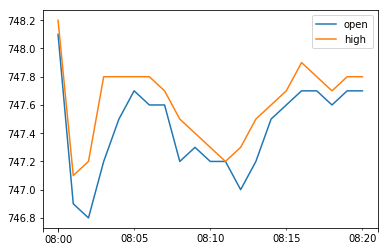

In [16]:
pc[['open','high']].plot()

In fact, we can see the strong linear relationship between them if we plot them against each other:

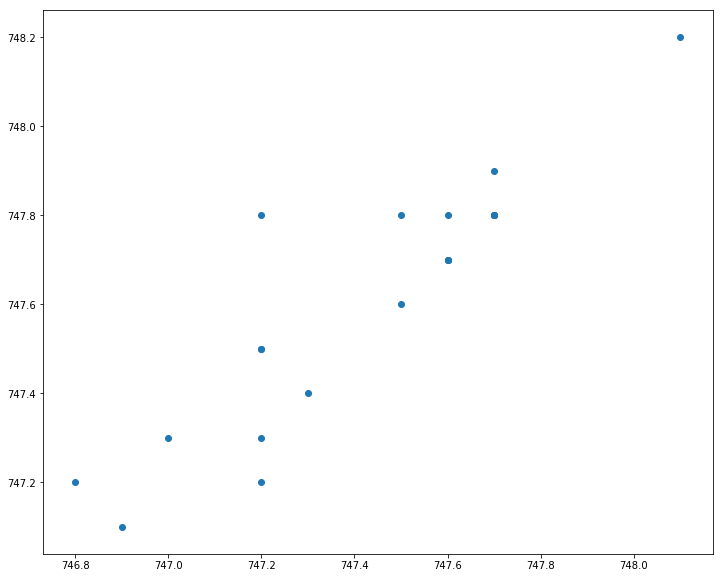

In [17]:
scatter(pc['open'],pc['high'])

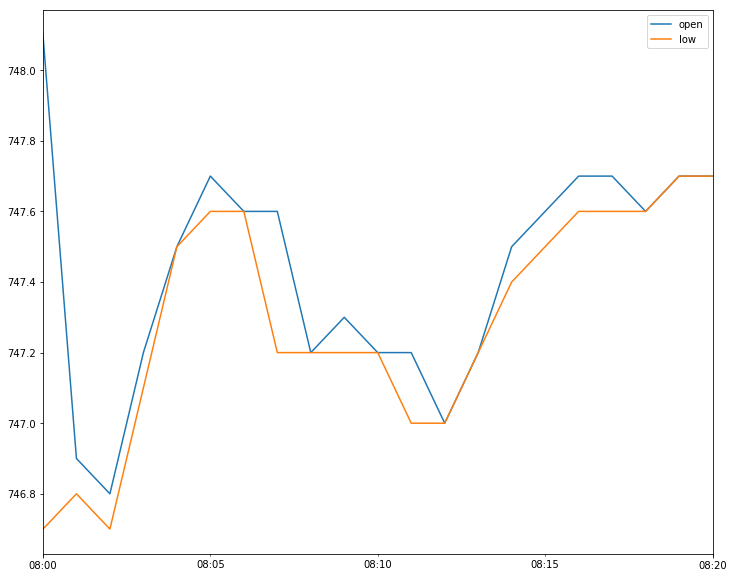

In [18]:
pc[['open','low']].plot()

While these two still follow each other to some degree, the first two datapoint movements (the open drops a lot, while the low increases over the first minute) likely contribute a lot to the correlation coefficient.  We can see other diverging behaviour in the prices, though.

One of the lowest correlations is between the open and the close:

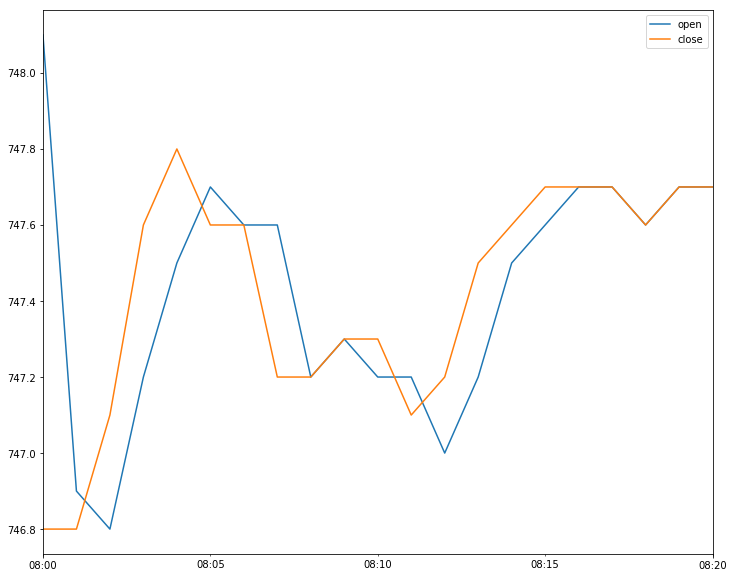

In [19]:
pc[['open','close']].plot()

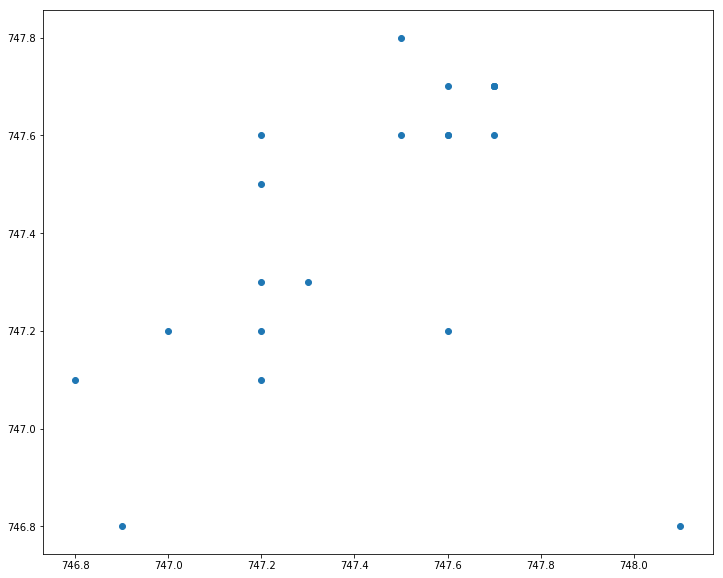

In [20]:
scatter(pc['open'],pc['close'])

The relation appears somewhat linear, but is rather spread out, and has the final point on the right that breaks the linearity.  While it might be tempting to suggest that this point (chronologically, the first point) is an outlier, financial markets tend to be very volatile price-wise at open; as a result, this cannot be removed as an outlier, as it is an actual recorded price.

### Note about Causation

The correlation coefficient lets us know how closely different data sets "move" together, but this doesn't tell us if they are actually connected in some way.  The important things to remember is that having two data sets that are highly correlated does not mean they are *causally* linked (i.e.: the changes in one do not necessarily *cause* the changes in the other), and more information than just the correlation must be gathered to determine if they are causally related.

A famous example is this graph, which depicts the inverse correlation between global temperatures, and population of pirates over time:

 <img src="http://i.imgur.com/InBrOxY.png",width=600,height=600>

The data used for this shows a strong inverse correlation between the two, but it would be ridiculous to surmise that the falling pirate population is *causing* the rise in global temperatures.  It's most reasonable to assume these events are entirely independent of each other, until any evidence could be produced to suggest otherwise.

**Remember:  correlation is not causation.**

### Distributions

Distributions come from the realm of probability; while our analysis may not involve computing probabilities of outcomes directly, our data sets may be able to use some of insight we gain from distributions depending on their own shape.<br>
A *probability distribution* for a given set of outcomes (experimental data collected, etc.) is a function which tells you the probability of occurrence of each of the outcomes.  For example, if you were to roll a (fair) 6-sided die, the probability that any particular number would come up is the same as any other number coming up (1/6). Hence, the distribution of outcomes is uniformly distributed to the value 1/6.<br>
This is known as the discrete **Uniform Distribution**, and in general looks like this:

<img src="http://i.imgur.com/OQV3B5d.png",width=550,height=550>


If we were to extend this from a discrete situation (e.g.: rolling a die) to a continuous situation (e.g.:randomly picking a real number in a given interval) where each outcome is equally as likely, we would obtain the continuous Uniform Distribution:

<img src="http://i.imgur.com/9PgTRdS.png",width=550,height=550>

There are not many interesting data sets that resemble this distribution directly, but it is very important nonetheless:  because of its relation to random number generation, it's intrinsically tied to analysis techniques like Monte Carlo simulations. <br>
More complicated distributions arise from events where the probability is not equally likely.  We talked about rolling a single die, but if we were to roll two dice together and add up the values, we would have a much different distribution; only one combination of dice will add up to 2 (1&1), but many more combinations will lead to a sum of 7 (1&6, 2&5, 3&4, 4&3, 5&2, 6&1):

<img src="http://i.imgur.com/KZ6BL5I.png",width=550,height=550>

This discrete distribution approaches one of the most common distributions that appears in nature, the **Normal** or **Gaussian Distribution**:

<img src="http://i.imgur.com/HCedwf4.png",width=550,height=550>


The Gaussian distribution is symmetric about its mean, and its height/falloff width is determined by the variance (as shown in the graph).  For a given $\mu,\sigma^2$, the function that describes the Gaussian distribution is given by:
 $$ f(x) = \frac{1}{\sqrt{2\pi\sigma^2}}e^{-(x-\mu)^2/2\sigma^2} $$
making this an exponential-type distribution.  Data that closely resemble the Gaussian distribution show up frequently in nature, and experimental data will often be modelled on Gaussians.  Examples of approximately Gaussian (or log-normal) data include human height/weight distributions, experimental measurement errors, and the results from playing with a Galton Box/bean machine:

<img src="http://i.imgur.com/3boMDiI.png",width=550,height=550>

Another reason Gaussian distributions are important is because of the *Central Limit Theorem*, which (broadly speaking) states that if you take the average of a random sampling of independent observations, and continue doing this many times, the averages will approach being normally distributed.  The original observations don't have to come from a normally distributed process; the continued averaging process will approach a normal distribution regardless.

One of the very useful features of this distribution is that it has very regular proportions of data contained specific distances away from the mean:

<img src="http://i.imgur.com/qfJdMnq.png",width=550,height=550>
(img credit: Dan Kearnler)<br>

In particular, this means almost all of the data in a normally distributed set will be contained within three standard deviations from the mean. We will see this is very useful for dealing with outliers in data sets that are (approximately) normally distributed.  When we generate random numbers in some range, we generally want them to be uniformly distributed.  If we had a normally distributed data set though, and wanted to randomly sample from it, a better bet would be to sample using a method that conforms to the distribution.  NumPy comes with a normally distributed random number generated, with the syntax<br>
`np.random.normal(loc=mean,scale=std,size=amount to generate)`

In [21]:
np.random.normal(loc=10,scale=2,size=20)

array([  6.12673936,  13.13806329,  11.16237098,   9.3814603 ,
         9.53239714,   9.05934208,   7.7758972 ,   7.84705743,
        12.57310687,  10.02115651,  12.50474542,   9.44169439,
         8.73856635,  12.48288307,  11.87297953,   8.90456586,
         6.52921038,   9.29462248,   8.15937511,   8.42100236])

It's easy to see that most of the numbers generated are within 1-2 standard deviations from the mean we defined. 

The normal distribution has a lot of useful properties, but using them presume that we know the precise mean and standard deviation of the set underlying the data.  Often our data sets are simply samples of a given population of interest, and we do not know the actual values of $\mu,\sigma$ for the entire population, just for the samples.
This is where the the **t-Distribution** (sometimes called the **Student's t-Distribution**) comes into play.  It's used to estimate the mean of a Gaussian set where the sample size is small, and the standard deviation of the set is unknown.  The red and green graphs show the t-distribution for one and two degrees of freedom, with the blue graph shows the Gaussian distribution for comparison:

<img src="http://i.imgur.com/kA9affe.png",width=550,height=550>

While this looks like a normal distribution, it does not fall off as quickly, meaning it is more likely to contain elements further away from the mean.  This distribution is related to the **Student's t-test**, whose uses include testing an hypothesized mean for a small sample sized data set, and testing if a linear regression model's slope is significantly different from 0.

Th **chi-squared distribution** is related to randomly sampling from a number of normal distributions, where the $k$ values represent the degrees of freedom in the sampling. 

<img src="http://i.imgur.com/B4JWsTU.png",width=600,height=600>

The chi-squared distribution gives rise to the chi-squared test, which are specifically for categorical data (i.e.: non-numerical data).  We will be revisiting both the chi-squared and Student's t-tests in Unit 9.

### Interquartile Range

One way to use statistics to try to find outliers is using the **Interquartile Range** criteria.  Given a data set $X$, the *quartiles* of $X$ are defined as:
1. First Quartile (25th Percentile): Separates the lowest 25% of the data from the upper 75%.
2. Second Quartile (50th Percentile): Separates the data into two equal halves.  We've encountered this previously under its other name:  the median.
3. Third Quartile (75th Percentile): Separates the lower 75% of the data from the upper 25%.

We can compute these in Pandas using the `.quantile()` function.  For example:

In [18]:
s = pd.Series(np.random.randint(0,20,size=9))
print(sorted(s.values))

[0, 2, 2, 6, 11, 15, 18, 18, 18]


In [19]:
s.quantile(0.25)

2.0

In [21]:
s.quantile(0.5)

11.0

In [22]:
s.quantile(0.75)

18.0

The interquartile range is defined as the difference between the third and first quartiles. 

In [23]:
s.quantile(0.75) - s.quantile(0.25)

16.0

One way to check for outliers in a data set is with the following method:

Let the $n^{th}$ quartile be denoted $Q_n$, and let $IQR$ be defined as $Q_3-Q_1$, the interquartile range. A value x from the data set is (potentially) an outlier if either:
* $ x < Q_1 - 1.5\cdot IQR$,
* $ x > Q_3 + 1.5\cdot IQR$.

Now, this by no means is guaranteed to tell you what the outliers of your data set are, because the context of the data is important (e.g.:maybe the price for Natural Gas futures really *did* jump very high that one day because of price-driving news, and it isn't an outlier).  But it is a good guideline for at least identifying potential outliers.  Let's write a function which takes a Pandas Series, and returns a list of possible outliers using the interquartile range method.

In [32]:
def IQR_outliers(series):
    iqr15 = 1.5*(series.quantile(.75) - series.quantile(.25))
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    return list(series[(series < q1 - iqr15) | (series > q3 + iqr15)])

And let's use this function to find possible outliers from the following data set:

In [35]:
s1 = pd.Series([ 9, 11, 30, 28, 16, -100, 13, 27, 10, -45, 20, 22, 10, 14, 24, 19, 12, 27, 22, 11, 26, 26, 21, 
                24, 20, 27, 18, 11, 18, 14, 30,  8, 29, 19, 22, 19, 22, 14, 29, 38, 9, 31, 6, 900])

IQR_outliers(s1)

[-100, -45, 900]

## Bayesian Probability

There are a number of different interpretations of what "probability" means.  The Bayesian school of thought is that probability represents a way to quantify a personal belief about an outcome, or as a *reasonable expectation*.  It is based on Bayes' Theorem, which we will be seeing shortly.  This is in contrast to the frequentist school of thought, for which the probability of an event occurring is the limit of its relative frequency over a large number of experiments or trials.

### Notation and Formulas

The first ingredient of probability is a _sample space_. The sample space is the set of outcomes that can possibly occur. For example, if we are thinking about rolling a die then we might have a sample space $\Omega_{\text{die}} = \{1,2,3,4,5,6\}$.

_Events_ are subsets of the sample space; they're things that could happen. There are simple events that only like $A=\text{you roll a 1}$, but we can think about more complex events that contain multiple outcomes from the sample space as well, like $B=\text{you roll an even number}$. Note that each of these can be expressed explicitly as subsets of the sample space: $A=\{1\}$ and $B=\{2,4,6\}$.

A probability is a function that takes events and gives back numbers. The number is always between 0 and 1, and it satisfies certain properties that we won't go into in detail here, but that you can read about [here](https://en.wikipedia.org/wiki/Probability_axioms).

#### Mutually Exclusive Events

We say that events $A$ and $B$ are _mutually exclusive_ if it would be impossible for them to both happen at the same time. An important rule of probability is that for mutually exclusive events, the probability that at least one of them happens is the sum of their probabilities.

$$P(A\cup B) = P(A) + P(B).$$

Note that this is only true for mutually exclusive events. For events that could possibly both happen at the same time, we need to adjust the formula a bit:

$$P(A\cup B) = P(A) + P(B) - P(A\cap B)$$

#### Conditional Probability
If we know that event $A$ has already occurred, how does it affect the probability that event $B$ will occur?  The *conditional probability* of $B$ given $A$, written $P(B\,|\, A)$, is given by the probability of both $A$ and $B$ happening, scaled by the probability of $A$ happening (since it's already happened):

$$P(B\,|\, A) = \frac{P(B\cap A)}{P(A)} $$

If, for example, we know that in a given city, the probability on any day of it being heavily overcast (H) is 0.45, and we know the probability that it is both heavily overcast AND raining (R) is 0.37, then the probability that it is raining on a given heavily overcast day is:

$$ P(R\,|\,H) = \frac{P(H\cap R)}{P(H)} \,=\, \frac{0.37}{0.45} \,\cong\, 0.82. $$

#### Independent Events

We say that events $A$ and $B$ are independent if, when you know that $A$ happened, that tells you nothing about whether $B$ happened. We can write this in terms of conditional probability as follows:

$$\P(A|B) = P(A)$$

It turns out that under the assumption that $A$ and $B$ are independent, we can come up with a nice formula for the probability $P(A\cap B)$ that they both happen.

$$\begin{align}
P(A \cap B) &= P(A \cap B) \times \frac{P(B)}{P(B)} \\
&= \frac{P(A \cap B)}{P(B)} \times {P(B)} \\
&= P(A|B) \times P(B) \\
&= P(A) \times P(B)
\end{align}$$

The last line is by the independence assumption--without these events being independent we could not justify this last line, and the formula would be wrong! In general, it is not straightforward to come up with the probability of $P(A\cap B)$ from $P(A)$ and $P(B)$ alone, so independence is a very strong assumption that makes computation a lot easier.

#### Examples

As an example, let's suppose we roll a 6-sided die and flip a coin at the same time.  These are independent events, so if we wanted to know the probability that we either roll a 2 ($P(2) = 1/6$) **or** have heads show up ($P(H)=1/2$), we compute:

$$ \begin{align} 
P(2\cup H) &= P(2) + P(H) - P(2 \cap H) \\
&= \frac{1}{6} + \frac{1}{2} - \left(\frac{1}{6} \times \frac{1}{2}\right) \\
&= \frac{7}{12}
\end{align}$$ 



### Bayes' Theorem

Bayes' Theorem allows us to relate the conditional probability of two events in terms of inverse probability:

$$  P(A\,|\,B) = \frac{P(B\,| \, A)P(A)}{P(B)} $$

i.e.: the conditional probability of $A$ given $B$ is the ratio of the probability of $A$ to the probability of $B$, multiplied by the conditional probability of $B$ given $A$.  This will be of importance in the classification unit, when we learn about Naive Bayes classification.

#### Example
Let's look at an example.  Suppose that there is a specific species of green frog, and in a particular jungle there are 3 spawning areas which we will call $X,\,Y,\,\text{and}\,Z$.  Let the probability that any given frog in the jungle has spawned from each of these three areas be $0.42,0.33,\,\text{and}\,0.25$, respectively.  Suppose further that the probabilities that any frog spawned from these locations is *blue* are $0.15,\,0.12,\,\text{and}\,0.08$, respectively.  If we find a frog in the jungle that is blue, what is the probability that it spawned from location $Y$?

We can display this data via:

In [27]:
frogs = pd.DataFrame({'Spawn':[0.42,0.33,0.25],'Blue':[0.15,0.12,0.08]},index=['X','Y','Z'])
frogs

,Spawn,Blue
X,0.42,0.15
Y,0.33,0.12
Z,0.25,0.08


Symbolically, the `Blue` column represents $P(B\,|\,X),\,P(B\,|\,Y),\,P(B\,|\,Z)$, and the `Spawn` column represents $P(X),\,P(Y),\,P(Z)$.

From Bayes' Theorem, the probability that our blue frog comes from spawning location $Y$ is $P(Y|B)$, given by

$$ P(Y\,|\,B) = \frac{P(B\,|\,Y)P(A)}{P(B)}.$$

From our table, the conditional probability in the numerator is $P(B\,|\,Y)=0.12$.  The denominator represents "what is the probability that a given frog in the jungle is blue?".  We can compute this as

$$ P(B) = P((B\cup X)\cap(B\cup Y)\cap(B\cup Z)); $$

i.e.: the probability of "the blue came from $X$ OR the blue from came from $Y$ OR the blue from came from $Z$". If we rearrange the definition of conditional probability above, we have

$$ P(B\cap X) = P(B\,|\,X)\cdot P(X). $$

Since the blue frog can only have come from one of the spawning locations, these probability are mutually exclusive (i.e.: if the blue frog came from spawning location $X$, it can not have come from locations $Y$ or $Z$, etc.), and hence we have:

$$ 
\begin{align} P(B) &= P((B\cap X)\cup(B\cap Y)\cup(B\cap Z))\\
                   &= P(B\cap X)+ P(B \cap Y)+ P(B\cap Z)\\
                   &= P(B\,|\,X)\cdot P(X)+P(B\,|\,Y)\cdot P(Y)+P(B\,|\,Z)\cdot P(Z)\\
                   &= (0.15)(0.42)+ (0.12)(0.33)+ (0.08)(0.25) \\
                   &= 0.1226. 
\end{align}$$

So we have,

$$ P(Y\,|\,B) = \frac{P(B\,|\,Y)P(Y)}{P(B)}\, =\,  \frac{(0.12)(0.33)}{0.1226} \,\cong\,0.32. $$

Let's program a simple function which will give us the probability of a blue frog coming from any specified location with our given data set.

In [28]:
def blue_frog_prob():
    
    

SyntaxError: unexpected EOF while parsing (<ipython-input-28-e54bddf980ab>, line 2)

## Vectors, Matrices
### Why?
What's the purpose of learning abstract mathematical concepts like linear algebra?  There are two very important answers to this:
1. The main modelling technique we are going to learn, linear regression, is defined using a vector equation.
2. Linear algebra is one of the only highly-applicable mathematical areas that we understand extremely well.

In addition to linear regression, the concepts of linear algebrea are integral to many sections of data science and machine learning, including gradient descent, differential evolution, and neural networks.  In this section we will present some theoretical concepts, and do examples using familiar data structures.

### Vector Spaces

Broadly speaking, a *vector space* $V$ is a collection of objects, where we can
* 'Add' any two objects in $V$ together to get another object in $V$.
* 'Scale' any object in $V$ by a number to get another object in $V$.

The vector spaces we are concerned with are *real* vector spaces, $\mathbb{R}^n$, which consist of sequences (ordered lists) of real numbers $(\mathbb{R})$ called *n-tuples*.  We write these n-tuples as single columns enclosed in square brackets; for example, a 3-tuple of real numbers (i.e.: an element of $\mathbb{R}^3$) would look like:
$$ \begin{bmatrix} 2 \\ 0 \\ 5 \end{bmatrix} = \begin{bmatrix}2 & 0 & 5 \end{bmatrix}^\text{T} $$
The superscript T on the right hand side denotes the *transpose* of the vector, which means to take a column and make it into a row (with the numbers in the same order), or a row into a column.  While we think of vectors as columns, it's often easier to write them as rows with the transpose symbol.  <br>
For any $n=1,2,3,\ldots$, the vector space $\mathbb{R}^n$ as a set is formally defined as:

$$ \mathbb{R}^n = \left\{\, \bigl[\,x_1\,\,x_2\,\,x_3\,\,\cdots\,\,x_n\,\bigr]^\text{T}\,\big|\,x_i\in\mathbb{R}\,\text{for all }1\leqslant i\leqslant n\right\}    $$

So now we now how the vectors look, but how do we define the vector addition and scalar multiplication?  This is accomplished *component-wise*.  Here's an example of vector addtion:
$$ \begin{bmatrix}1 \\ 3 \\ 5 \end{bmatrix} + \begin{bmatrix}-2 \\ 0 \\ 7 \end{bmatrix} = 
\begin{bmatrix}1+(-2)\\3+0\\5+7 \end{bmatrix}= \begin{bmatrix}-1\\3\\12 \end{bmatrix}  $$ 
and of scalar multiplication:
$$ 3\begin{bmatrix}2\\6\\0 \end{bmatrix} = \begin{bmatrix}3\cdot2\\3\cdot6\\3\cdot0 \end{bmatrix} = \begin{bmatrix}6\\18\\0 \end{bmatrix} $$

In general, the vector addition and scalar multiplication for vectors in $\mathbb{R}^n$:

$$  \begin{bmatrix}x_1\\x_2\\ \vdots \\ x_n \end{bmatrix}+\begin{bmatrix}y_1\\y_2\\ \vdots \\ y_n \end{bmatrix}
= \begin{bmatrix}x_1+y_1\\x_2+y_2\\ \vdots \\ x_n+y_n \end{bmatrix},  
\qquad
a\begin{bmatrix}x_1\\x_2\\ \vdots \\ x_n \end{bmatrix}= \begin{bmatrix}ax_1 \\ax_2\\ \vdots \\ ax_n \end{bmatrix} $$
for all $x_i,y_i,a\in\mathbb{R}$, 

### Using vectors in programming

You may have noticed that these n-tuple vectors look a lot like Python lists of numbers, since they are ordered and indexed (though in math, like most of life, counting starts at 1).  A first thought might be "well, we could use lists for dealing with vectors in Python".  How would we handle vector addition?  Naively, we may just try to use +

In [36]:
[1,3,5] + [-2,0,7]

[1, 3, 5, -2, 0, 7]

Well, that didn't work because the + operator *concatenates* strings.  What about trying to multiply by a number?

In [37]:
3*[2,6,0]

[2, 6, 0, 2, 6, 0, 2, 6, 0]

That also doesn't work.  Multiplying a list by a number $n$ makes a new list which is $n$ copies of the original list, concatenated.  So how would we accomplish these things?  There are a few higher-level purely Pythonic ways to do it (using the `zip()` function in a list comprehension, importing operators, etc.), but let's try to program it from scratch, with what we know.

In [38]:
def scalar_mult(listname,scalar_value):
    newlist = []
    for i in range(len(listname)):
        newlist.append(scalar_value*listname[i])
    return newlist

In [39]:
scalar_mult([2,6,0],3)

[6, 18, 0]

This program doesn't even involve error catching (what if we fed `'a'` as the scalar value?), and is fairly long.  How would we define vector addition in a similar manner? (Note: we can only add vectors that are the same 'length', which we would need to account for in the function.)

In [ ]:
def vector_addition(list1,list2):
    

These programs are fairly long for such simple actions.  This is why it's much more beneficial to use the powerful tools included in other packages, like Pandas and NumPy.  Instead of using lists, we can use Series objects, which naturally act like vectors:

In [40]:
v1 = pd.Series([1,3,5])
v2 = pd.Series([-2,0,7])
v1+v2

0    -1
1     3
2    12
dtype: int64

In [41]:
v = pd.Series([2,6,0])
3*v

0     6
1    18
2     0
dtype: int64

As mentioned in a previous unit, not only is the code a lot shorter when using Series, but the operations actually happen a lot faster than the iterative methods we've used.  This is especially handy when you have dataframes that are hundreds of thousands of lines long.

### Matrices, Multiplication

A matrix is a natural extension of the vectors we've seen.  An $n\times m$ real matrix is an *array* of real numbers, with $n$ rows and $m$ columns.  For example, a $2\times3$ matrix would look like:
$$ \begin{bmatrix}1 & 0 & 3\\ 2 & -1 & 4  \end{bmatrix} $$

In particular, vectors in $\mathbb{R}^n$ are just $n\times1$ matrices ($n$ rows, one column).  The general convention is to name matrices using uppercase letters, like $A,B$, etc. 

Matrices have a number of important uses and features, but the main one we are concerned with is how they *transform* vectors through matrix multiplication.  Multiplying a matrix (on the left) with a vector is defined if and only if the number of *columns* of the matrix is equal to the number of *rows* of the vector.  The resulting vector is going to have the same number of *rows* as the matrix.  For example, multiplying a $3\times2$ matrix against a $2\times1$ vector gives a $3\times1$ vector.
The actual multiplication is more complicated than the other vector operations we've seen so far; we'll introduce the process first with a simple example,  Suppose we wanted to compute the following product:

$$ \begin{bmatrix} 1 & 3 \\ -1 & 0 \end{bmatrix}\begin{bmatrix}2\\ 4\end{bmatrix} $$

The resulting vector will be $2\times 1$.  To get the first entry of the result, we component-wise multiply the first row of the matrix with the vector, and add up all of the results; this kind of operation is referred to as the *dot product* of the vectors.

$$ \begin{bmatrix} 1 & 3 \\ \, & \, \end{bmatrix}\begin{bmatrix}2\\ 4\end{bmatrix} = \begin{bmatrix}(1)(2)+(3)(4)\\\, \end{bmatrix} = \begin{bmatrix}14\\\,\end{bmatrix}
$$

Completing the result with the other computation:

$$ \begin{bmatrix} 1 & 3 \\ -1 & 0 \end{bmatrix}\begin{bmatrix}2\\ 4\end{bmatrix} = \begin{bmatrix}(1)(2)+(3)(4)\\ (-1)(2)+(0)( 4)\end{bmatrix} = \begin{bmatrix}14\\-2\end{bmatrix}
$$

See the Appendix for the more general definition.<br>
Trying to program this iteratively would be a pain, but NumPy has the functionality built in.  We can build matrices using the `np.array()` object; a Pandas Series is a one-dimensional array.  

In [ ]:
x = np.array([(1,3),(-1,0)])
y = np.array([2,4])

In [ ]:
x

In [ ]:
y

We multiply them together using the function `np.dot()`.

In [ ]:
np.dot(x,y)

Which is the result we obtained above.  

#### Bookkeeping Notation

We can keep track of elements of matrices and vectors using indexing notation.  We've already seen this with vectors:  if we have a vector $X$, we can refer to the $i^{\text{th}}$ element as $x_i$, e.g.: a $3\times 1$ vector $X$ can be written:

$$ X = \begin{bmatrix} x_1 \\ x_2 \\ x_3 \end{bmatrix}. $$

It gets a little more complicated with matrices.  In this case, we'll index the elements with two indices:  the first to denote the row, and the second to denote the column.  If we had a matrix $A$, the elements would be referred to as $a_{ij}$, where $i$ would denote the row, and $j$ would denote the column; for example, $a_{32}$ is the element of $A$ in the third row, second column.  (Note:  when we get into double digit numbers in the indices, we can separate them by a comma: $a_{12,47}$.  This usually isn't an issue, though, because the point of the indices is to represent larger computations in more compact notation.)<br>
If we had a $3\times 3$ matrix $A$:

$$ A = \begin{bmatrix} 2& 4& 6 \\ 0& 1& -1 \\ 5& 7& 13     \end{bmatrix}, $$

then, for example in this case, $a_{11} = 2$, $a_{32} = 7$, and $a_{23} = -1$.  We can represent the matrix-vector multiplication using this notation:  if we have an $m\times n$ matrix $A$, and an $n\times 1$ vector $X$, then the element in the $k^{\text{th}}$ row of the resulting vector $AX$ is given by
  
$$ (ax)_{k} = a_{k1}x_1 + a_{k2}x_2 + \ldots a_{kn}x_n = \sum_{i=1}^n a_{ki}x_i. $$

Collecting it all together:

$$ AX = \begin{bmatrix} a_{11} & a_{12} & \cdots & a_{1n} \\ 
a_{21} & a_{22} & \cdots & a_{2n} \\ 
\vdots & \vdots & \ddots & \vdots \\ 
a_{m1} & a_{m2} & \cdots & a_{mn} \\ 
\end{bmatrix}\begin{bmatrix}x_1 \\ x_2 \\ \vdots \\ x_n  \end{bmatrix} = 
\begin{bmatrix}a_{11}x_1 + a_{12}x_2 + \ldots a_{1n}x_n\\
a_{21}x_1 + a_{22}x_2 + \ldots a_{2n}x_n\\
\vdots\\
a_{m1}x_1 + a_{m2}x_2 + \ldots a_{mn}x_n\end{bmatrix}.   $$

#### Matrix Equations

We can set up equations using matrix multiplication and vectors.  One common situation is: given a specific matrix $A$ and a specific vector $Y$, we may wish to find a vector $X$ that satisfies $AX = Y$.  For example, find an $X$ which satisfies:

$$  \begin{bmatrix} 2 & 1 \\ 7 & 4   \end{bmatrix}\begin{bmatrix} x_1 \\ x_2 \end{bmatrix} = \begin{bmatrix}5\\2 \end{bmatrix}.$$

This is equivalent to solving the system of equations

$$ \begin{align} 
2x_1 + x_2 &= 5 \\
7x_1 + 4x_2 &=2. 
\end{align}$$

We can solve such a system using NumPy's `linalg.solve`:

In [ ]:
A = np.array([[2,1], [7,4]])
Y = np.array([5,2])
X = np.linalg.solve(A, Y)

print(X)

When we get to linear regression, we will be solving equations of the form

$$ Y = X\beta + \epsilon $$

where $Y$ is our dependent variable, $X$ is a matrix composed of our independent variables, $\epsilon$ is a vector of error terms, and $\beta$ is a vector of unknown parameters that will fit a linear model to the data.

# Assignment 6
1. Definition reminder: given a time-series data set, with an $N$-period moving average $\mu_N$ and an $N$-period standard deviation $\sigma_N$, the *K-Upper Bollinger Bands* are defined as the rolling computation $(\mu_N + K\sigma_N)$ for some $K=1,2,\ldots$. Similarly, the *K-Lower Bollinger Bands* are $(\mu_N - K\sigma_N)$.  Load in the `timeseries_1.csv` price series, and create two new columns which are the first upper and lower Bollinger bands on a 4-minute level computed on the *open* price.  Create another column which has `True` if the high of any given minute is above the upper Bollinger band value, and `False` if not.
2. Consider the following set of data:<br>
`[ 31.64318274,  52.38028382,  52.06990842,  49.38683521, 66.2809943,  56.28673623,  56.31535831,  47.61107798, 51.22059076,  72.74444307,  44.92132396,  44.7806115 ,55.06875272,  53.30195541,  48.82836245,  56.5645093 ,58.60658527,  51.25941697,  31.19829968,  71.44567964,  50.90570844,  41.50918145,  46.12808914,  38.29642645, 74.76853757,  56.09746354,  49.40810407,  41.91971301,  59.79453349,  71.42976646,  84.08722246,  66.11230252, 52.09783487,  66.50079773,  47.23055517,  42.41625807,  34.99316584,  39.61756471,  51.67965582,  57.67403776, 60.54283988,  40.30238293,  46.61520191,  55.6952267 ,  43.87997719,  45.23675992,  59.35864021,  31.31812861, 74.5603146 , 62.91095588]`<br>
Use the Interquartile Method to find any possible outliers.  If there are any outliers, how many standard deviations away from the mean are they?
3. Load up the file `cordf.csv` file to answer these questions.
  1.  Create a correlation matrix to describe how the variables in this file are correlated to each other. Which pair of columns is the most correlated? Which is the least? Note the ambiguity in this question: what does it mean for one pair to be "more correlated" than another?
  2.  Create 5 scatterplots with the variable U on the x-axis in each, and the rest of the variables on the y-axes. Describe the relationship between the variables in each scatterplot. Compare and contrast your findings with the expectations you formed in question 1. Note: pandas has a cool function in pandas.plotting.scattermatrix that can do this kind of thing really fast. Make all the scatterplots by hand this time around, but play around with scattermatrix too when you're done to see how it works. Check out the docs here: http://pandas.pydata.org/pandas-docs/stable/visualization.html?highlight=color#scatter-matrix-plot
  3.  Taking what you find in parts 1 and 2 together, what can you surmise about what exactly is measured by the correlation coefficient? What do you think you can say about the relationship between two variables if the correlation coefficient is close to 1? Close to -1? Close to 0?
  4.  Are there transformations that you could apply to any of the variables V, W, X, Y, or Z such that the transformed variables would have a higher correlation with U? Why or why not?
4. (Bonus) Part of the definition of a vector space (see the appendix if you're interested) is that every vector space must have what is called an *identity* element.  The property this satisfies is that if you add the identity to any other vector, you get that other vector back again, unchanged.  For $\mathbb{R}^n$, what would the indentity element be?  Prove it in general.
5. (Bonus) Using the definitions we have provided for conditional probability, derive Bayes' Theorem.


# Appendix: Formal Definitions

A vector space is defined as follows:<br>
**Definition**: A *real vector space* is a set $V$, together with two operations, *addition* and *scalar multiplication* such that the following hold:
1. $(v_1+v_2)+v_3 = v_1+(v_2+v_3)$ for all $v_i\in V$.
2. $v_1+v_2 = v_2 + v_1$ for all $v_i\in V$.
3. There exists an element $0\in V$ such that $0+v = v+0 = v$ for all $v\in V$.
4. For any $v\in V$, there exists an element $-v\in V$ such that $v+(-v) = 0$.
5. $a(bv) = (ab)v$ for all $a,b\in \mathbb{R}$,\, $v\in V$.
6. $1v = v$ for all $v\in V$.
7. $a(v_1+v_2) = av_1 + av_2$ for $a\in \mathbb{R},\,v_i\in V$.
8. $(a+b)v = av + bv$ for all $a,b\in\mathbb{R},\,v\in V$.

For general matrix multiplication, given an $n\times m$ matrix $A$ and a $p\times r$ matrix $B$, the product $AB$ is defined if and only if $m=p$, i.e.: the number of columns of $A$ equals the number of rows of $B$.  Denote the element of $A$ in the $i^{th}$ row and $j^{th}$ column as $a_{ij}$, and similarly for $B$ as $b_{ij}$.  If we call $C=AB$, then the $c_{ij}$ element of $C$ is given by:
$$ c_{ij} = (a_{i1}\cdot b_{1j} + a_{i2}\cdot b_{2j} + \ldots + a_{im}\cdot b_{mj}) = \sum_{k=1}^m a_{ik}\cdot b_{kj}.$$

Matrices are ways to express *linear transformations*.  <br>
**Definition**: A *linear transformation* $T:\,V\to W$ between vector spaces $V$ and $W$ is a mapping which satisfies:
1. $T(v_1 + v_2) = T(v_1) + T(v_2)$ for all $v_i\in V$
2. $T(av) = aT(v)$ for all $a\in \mathbb{R},\,v\in V$.

There is a very important theorem which states that linear transformations are equivalent to transformations by matrices, and that for any linear transformation $T$, there is a unique matrix $A$ which induces $T$ in a given basis.
